# Introduction:
## Proposing a methodology of neural networks collaborating with each other:
Due to the importance of teamwork in neural networks, I suggested the following methodology, through which several neural networks can be used to predict the age of a person based on chest x-ray images for a large number of patients.
The proposed methodology is based on the existence of 4 neural networks that help each other in a specific way in order to reach the lowest value of the loss. We can summarize the proposed methodology according to the following steps:
- Model A is the model responsible for predicting the patient's age.
- Model B, another model, is also responsible for predicting the patient's age.
- Model C, another model, is also responsible for predicting the patient's age.
- Thus, we have so far 3 models out of 4, and therefore the methodology suggests that the fourth model tries to benefit from the results reached by each of the previous three models. This methodology aims to make the fourth model more capable of overcoming errors in predicting the patient’s age and making up for that difference, than By deducing the deficiency in each value that was predicted by each of the three previous models, and this is what was reached in the proposed study.
- Through which I was able to reach the lowest possible value of the loss function, the dimensions of the X-ray images included in the dataset were converted to (64, 64, 1) due to the lack of computational resources available to me.
- Thus, during the training process, Model 4 will make the three previous models output close to the correct values for the patient's age and at the same time fit with the mathematical equation that it is building, which makes it more able to reach greater accuracy in estimating the patient's age.
- In this case, we can consider model 4 as an additional control for the previous three models, and at the same time it is able to determine a more accurate value for the patient's age from the chest x-ray images.
- We can say that the fourth model is trying to identify weaknesses in each of the previous three models in order to improve the results

# Include packages:

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os
import pathlib

The dataset used in the study is in the link:
https://www.kaggle.com/competitions/spr-x-ray-age/overview

# Read and process the images contained in the dataset:

In [ ]:
dataset_folder = "/kaggle/input/spr-x-ray-age"

In [ ]:
dataset = pd.read_csv(os.path.join(dataset_folder, "train_age.csv"))
dataset.head()

,imageId,age
0,0,89.0
1,1,72.0
2,2,25.0
3,3,68.0
4,4,37.0


In [ ]:
len(dataset)

10702

In [ ]:
train = list(pathlib.Path(
                      os.path.join(dataset_folder, "kaggle/kaggle/train")
                  ).glob("*.*"))
test = list(pathlib.Path(os.path.join(
                      dataset_folder, "kaggle/kaggle/test"
                  )).glob("*.*"))

In [ ]:
len(train), len(test)

(10702, 11747)

In [ ]:
train.sort()

In [ ]:
train[:10]

[PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000000.png'),
 PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000001.png'),
 PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000002.png'),
 PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000003.png'),
 PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000004.png'),
 PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000005.png'),
 PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000006.png'),
 PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000007.png'),
 PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000008.png'),
 PosixPath('/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000009.png')]

In [ ]:
def read_images(pathes_images):
  images = []
  for img in pathes_images:
    img = cv2.imread(str(img), 0)
    img = cv2.resize(img ,(64, 64))
    img  = img / 255
    images.append(img)
  return images

In [ ]:
train = read_images(train)

In [ ]:
train = np.array(train)

In [ ]:
train.shape

(10702, 64, 64)

In [ ]:
import matplotlib.pyplot as plt
def show_images(images):
  plt.figure(figsize = (12, 12))
  for i in range(64):
    plt.subplot(8, 8, (i + 1))
    plt.imshow(images[i], cmap = 'gray')
  plt.show()

View samples of images included in the dataset

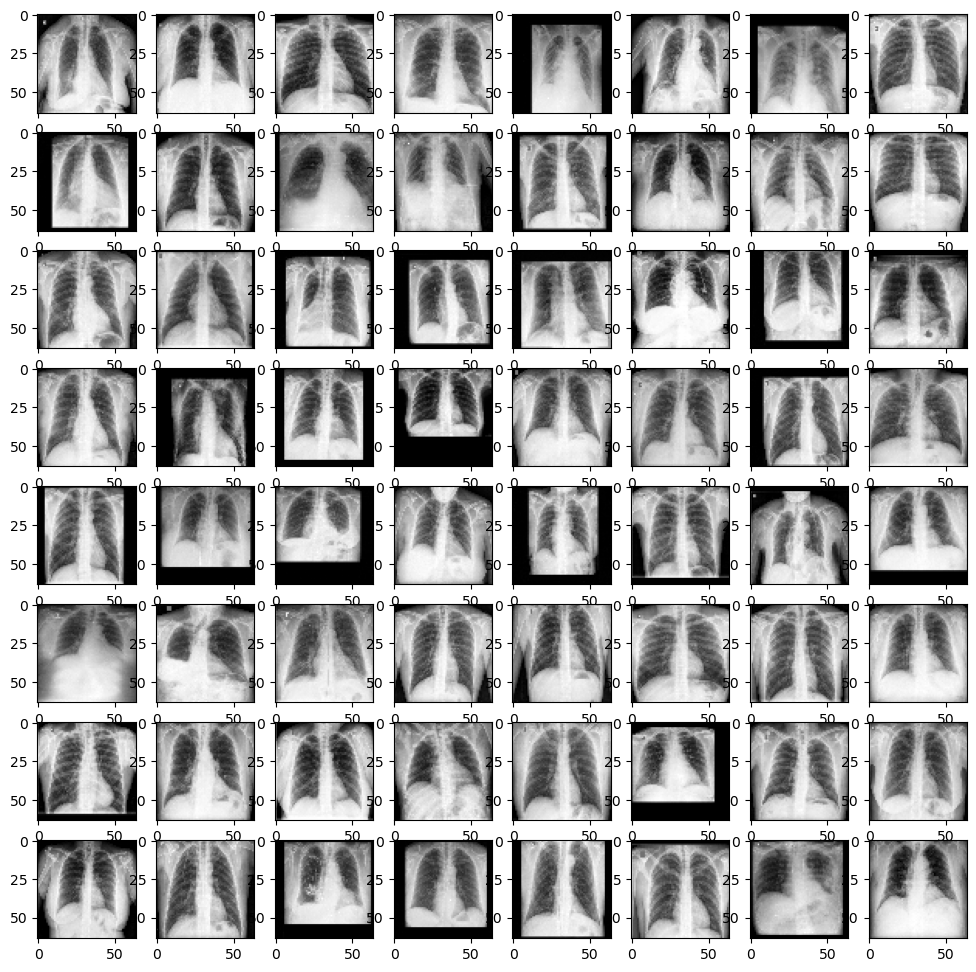

In [ ]:
show_images(train)

In [ ]:
label_dataset = pd.read_csv("/kaggle/input/spr-x-ray-age/train_age.csv")
label_dataset.head()

,imageId,age
0,0,89.0
1,1,72.0
2,2,25.0
3,3,68.0
4,4,37.0


In [ ]:
label = label_dataset['age']
label.shape

(10702,)

# Data Augmentation:
Given the importance of making the neural network more able to generalize its findings, and given the importance of helping the neural network during the training process and making it able to reach more stable training through the ability to create several copies of each of the images included in the dataset, which helps the neural network To identify the most important areas in determining the patient's age from chest x-ray images.

In [ ]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 0.1, 
    horizontal_flip = True,
    zoom_range = 0.3,
    rotation_range = 0.2
)

In [ ]:
def make_augmentation(images, label):
  images_ = []
  labels_ = []
  for index, value in enumerate(images): 
    for i in range(5):
      img  = image_data_generator.flow(np.reshape(value, (1, 64, 64, 1))).next()
      images_.append(img)
      labels_.append(label[index])
  return np.array(images_), np.array(labels_)
train, labels = make_augmentation(train, label)

In [ ]:
train.shape

(53510, 1, 64, 64, 1)

In [ ]:
train = np.reshape(train, (train.shape[0], 64, 64))

In [ ]:
train.shape

(53510, 64, 64)

In [ ]:
train.shape, labels.shape

((53510, 64, 64), (53510,))

Divide the images included in the dataset into test images and training images

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(train, labels, test_size = 0.2, random_state  = True)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((42808, 64, 64), (10702, 64, 64), (42808,), (10702,))

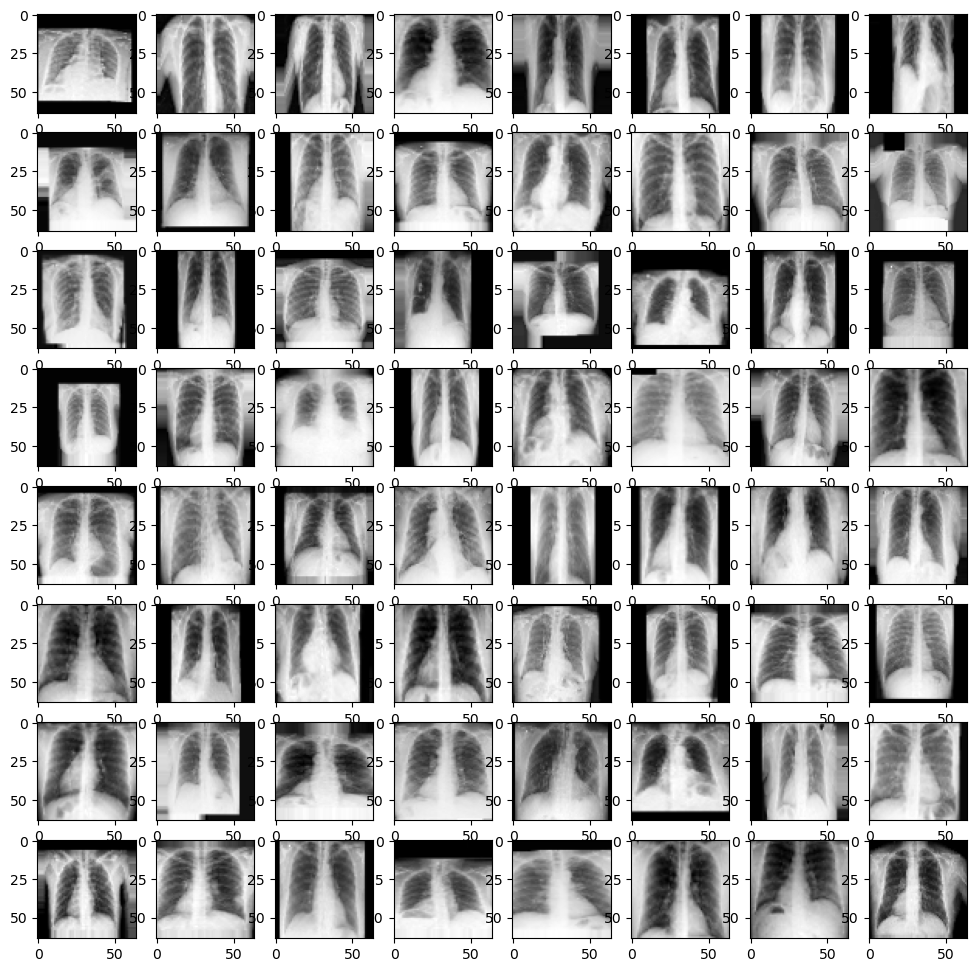

In [ ]:
show_images(xtrain)

# Neural network architecture proposal

- We will notice in the proposed structure that there are 3 models, each of which has a unified structure, but they differ from each other in the activation functions used.
Note that each of the three models is used to predict the age of the patient, and therefore, so far, we have 3 outputs whose task is to predict the age of the patient.
- The fourth model is an aggregate of the predicted age values for each of the previous three models, and therefore the task of the fourth model is to notice errors in reaching the exact age value of the patient for each of the previous three models, and at the same time it works on additional control and an additional penalty that is applied to Model the previous three in order to reach the lowest possible value of the loss.

In [ ]:
def convoultion_block(inputs, kernel_size, filter, activation, dilation_rate, strides, 
                      maxpooling):
  x = tf.keras.layers.Conv2D(filter, kernel_size, padding = 'same', strides = 2)(inputs)
  for block in range(3):
    y = tf.keras.layers.Conv2D(filter, kernel_size, padding = 'same',dilation_rate = dilation_rate)(x)
    y = tf.keras.layers.Dropout(0.2)(y)
    y = tf.keras.layers.Activation(activation)(y)
    y = tf.keras.layers.Conv2D(filter, 3, padding = 'same')(y)
    x = tf.keras.layers.average([y, x])
    x = tf.keras.layers.BatchNormalization()(x)
  return x

In [ ]:
input = tf.keras.layers.Input(shape = (64, 64, 1))
x = input
y = input
z = input
filters = [32, 64, 128]
for i in range(3):
  x1 = convoultion_block(x, 3, filters[i], 'relu', 1, 2, 
                      False)
  x = tf.keras.layers.average([x1, 
                               tf.keras.layers.Conv2D(filters[i], 1, padding = 'same', strides = 2)(x)])
for i in range(3):
  y1 = convoultion_block(y, 3, filters[i], 'elu', 1, 2, 
                      True)
  y = tf.keras.layers.average([y1, 
                               tf.keras.layers.Conv2D(filters[i], 1, padding = 'same', strides = 2)(y)])
for i in range(3):
  z1 = convoultion_block(z, 3, filters[i], 'LeakyReLU', 1, 2, 
                      True)
  z = tf.keras.layers.average([z1, 
                               tf.keras.layers.Conv2D(filters[i], 1, padding = 'same', strides = 2)(z)])

In [ ]:
x = tf.keras.layers.Flatten()(x)
y = tf.keras.layers.Flatten()(y)
z = tf.keras.layers.Flatten()(z)
x = tf.keras.layers.Dense(1, name = 'first', kernel_regularizer= tf.keras.regularizers.L1L2(0.01, 0.001))(x)
y = tf.keras.layers.Dense(1, name = 'second', kernel_regularizer= tf.keras.regularizers.L1L2(0.01, 0.001))(y)
z = tf.keras.layers.Dense(1, name = 'third', kernel_regularizer= tf.keras.regularizers.L1L2(0.01, 0.001))(z)
c = tf.keras.layers.concatenate([x, y, z])
c = tf.keras.layers.BatchNormalization()(c)
output = tf.keras.layers.Dense(1, name = 'final')(c)

We will notice here that we have 4 outputs and the optimization function RMSprop was used to provide the best performance during the training process.

In [ ]:
m = tf.keras.models.Model(
    inputs = input, 
    outputs = [x, y, z, output]
)
m.compile(
    loss = ['mae', 'mae', 'mae', 'mae'], 
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), 
)
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 32, 32, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_48 (Conv2D)             (None, 32, 32, 32)   320         ['input_1[0][0]']                
                                                                                              

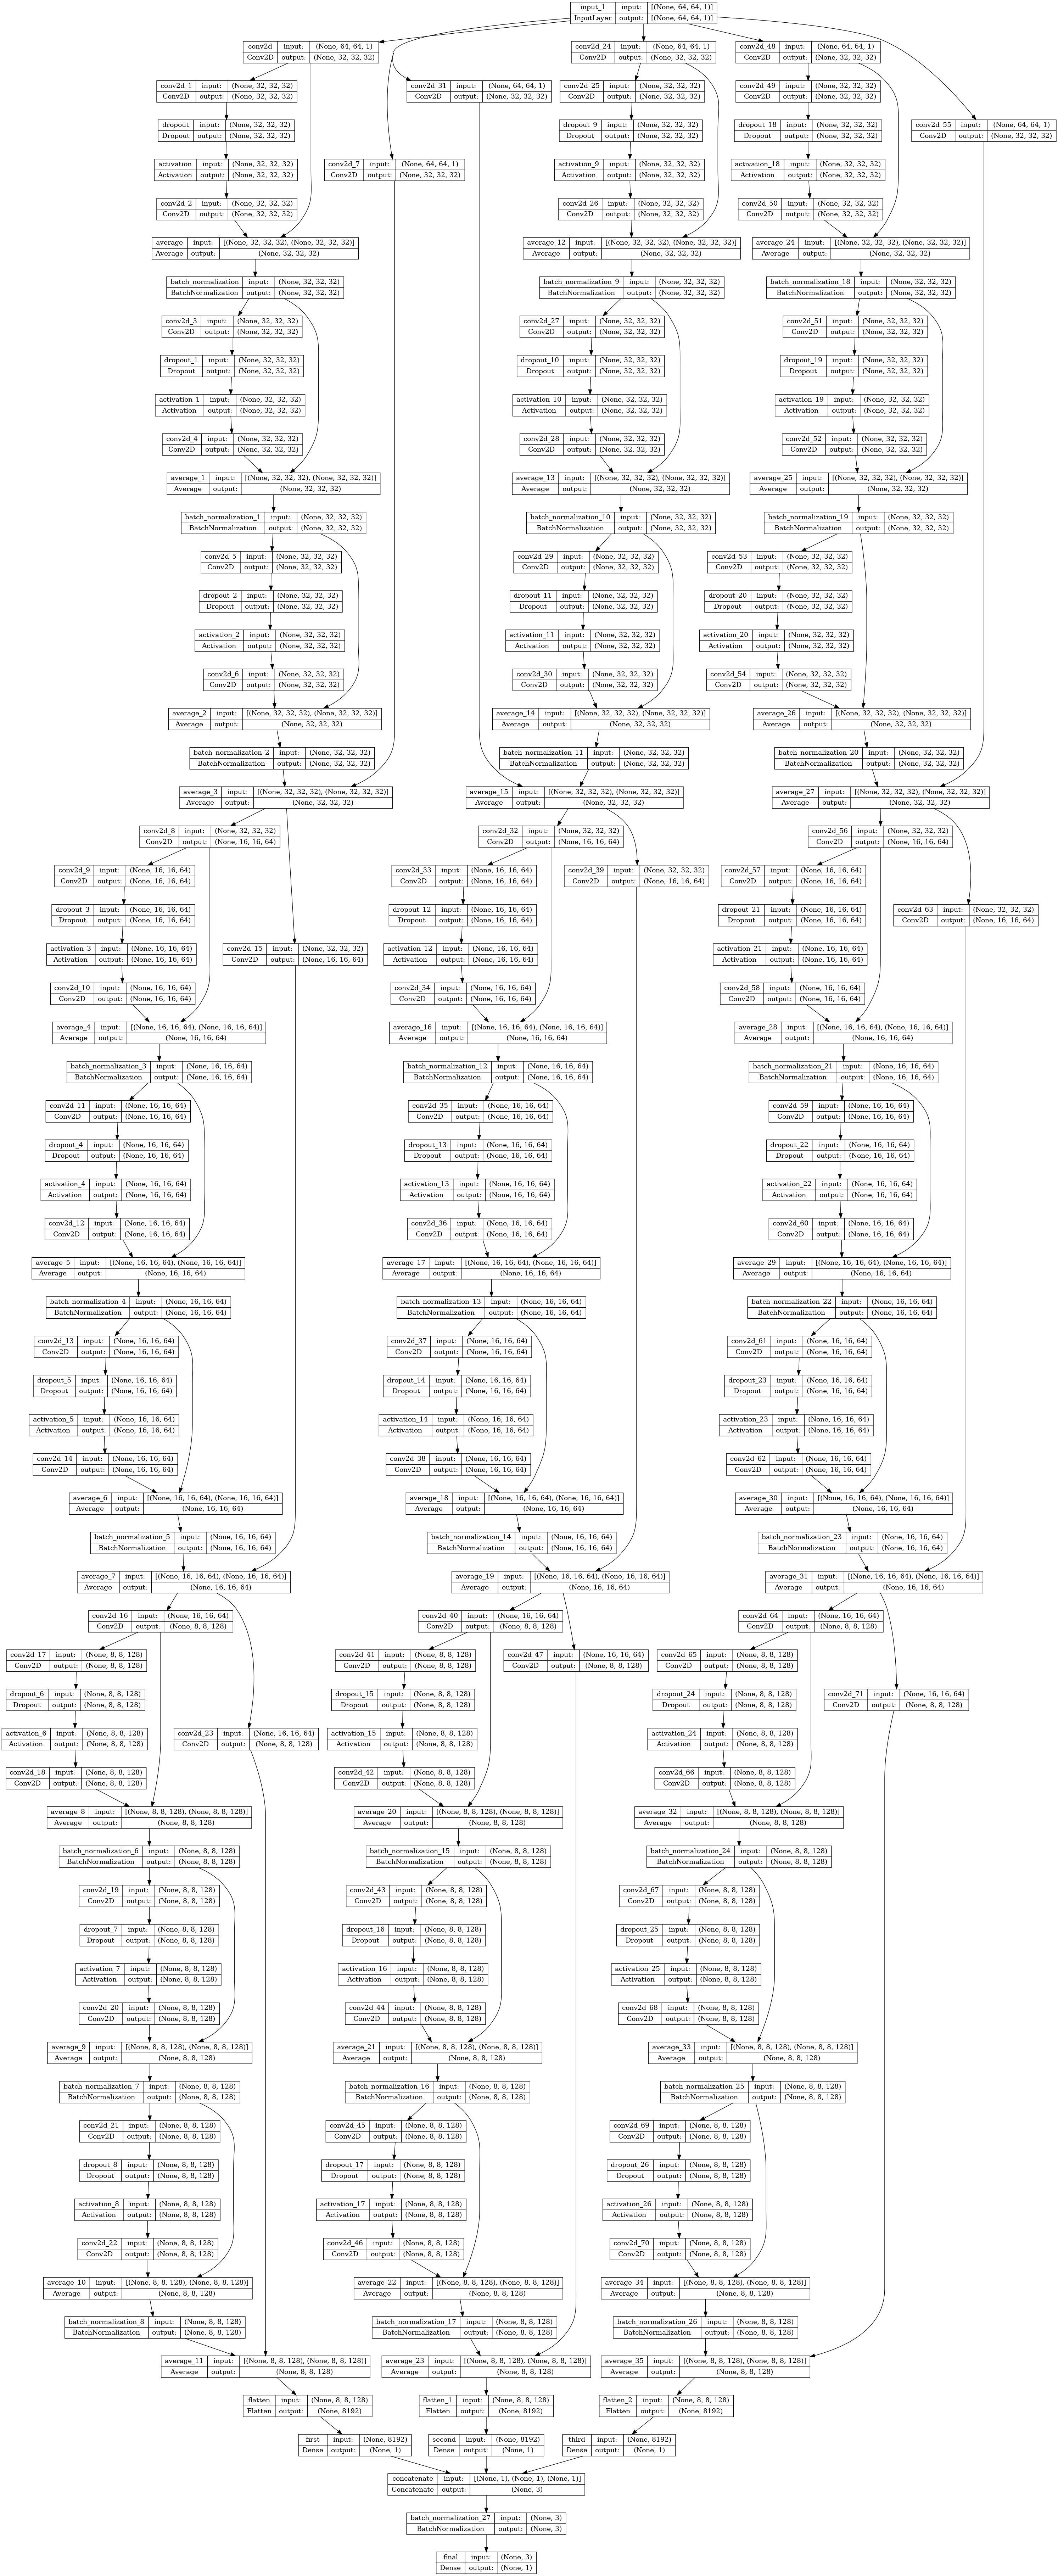

In [ ]:
tf.keras.utils.plot_model(m, show_shapes = True)

In [ ]:
history = m.fit(xtrain, ytrain, 
                validation_data = (xtest, ytest), 
                epochs = 160, batch_size = 32, 
                callbacks = [
                    tf.keras.callbacks.EarlyStopping(patience = 20, 
                                                     monitor = 'val_loss', 
                                                     mode = 'min', 
                                                     restore_best_weights = True),
                    tf.keras.callbacks.ReduceLROnPlateau(patience = 6, monitor = 'val_loss', 
                                                        mode = 'min', factor = 0.1)
                ])

Epoch 1/160


2023-03-05 20:35:51.232202: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1338/1338 [==============================] - 102s 52ms/step - loss: 85.5204 - first_loss: 11.6986 - second_loss: 12.1992 - third_loss: 12.7492 - final_loss: 46.9614 - val_loss: 75.5555 - val_first_loss: 9.4428 - val_second_loss: 13.6514 - val_third_loss: 10.6727 - val_final_loss: 40.3011 - lr: 0.0010
Epoch 2/160
1338/1338 [==============================] - 68s 51ms/step - loss: 62.6433 - first_loss: 9.1410 - second_loss: 9.5628 - third_loss: 10.0760 - final_loss: 32.5349 - val_loss: 51.7154 - val_first_loss: 8.0520 - val_second_loss: 9.5496 - val_third_loss: 10.5719 - val_final_loss: 22.3162 - lr: 0.0010
Epoch 3/160
1338/1338 [==============================] - 68s 51ms/step - loss: 40.2844 - first_loss: 8.3783 - second_loss: 8.8250 - third_loss: 9.2895 - final_loss: 12.5668 - val_loss: 36.9868 - val_first_loss: 8.0079 - val_second_loss: 9.7950 - val_third_loss: 9.6051 - val_final_loss: 8.2417 - lr: 0.0010
Epoch 4/160
1338/1338 [==============================] - 69s 51ms/step - loss: 34

**All we care about in the conclusion reached is the loss of the fourth model**

In [ ]:
import matplotlib.pyplot as plt
def draw_loss_history(loss, val_loss, loss_label, val_loss_label):
  plt.plot(loss, label = loss_label)
  plt.plot(val_loss, label = val_loss_label)
  plt.legend()

We notice during the training process that the fourth model, at the beginning, was not very consistent in identifying the errors committed by each of the previous three models, but with time, the fourth model was able to identify the error committed by each of the four models in assessing the patient's age.

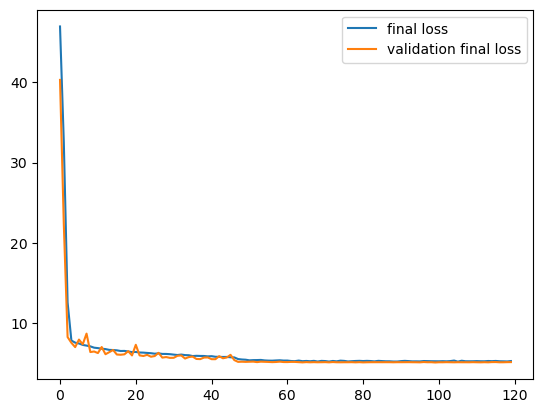

In [ ]:
draw_loss_history(history.history['final_loss'], 
                  history.history['val_final_loss'],
                  'final loss', 
                  'validation final loss')

**By evaluating the performance of the model on both training and test data, we note that the fourth model's loss on both training and test data is the least among the other three models.**

In [ ]:
m.evaluate(xtrain, ytrain)

1338/1338 [==============================] - 18s 13ms/step - loss: 18.0547 - first_loss: 4.1845 - second_loss: 4.2604 - third_loss: 5.3070 - final_loss: 3.9640


[18.054733276367188,
 4.184519290924072,
 4.2603607177734375,
 5.306952953338623,
 3.9640352725982666]

In [ ]:
m.evaluate(xtest, ytest)

335/335 [==============================] - 4s 13ms/step - loss: 21.8778 - first_loss: 5.2852 - second_loss: 5.4245 - third_loss: 5.7547 - final_loss: 5.0746


[21.877826690673828,
 5.285168647766113,
 5.424488067626953,
 5.75474214553833,
 5.074560165405273]

# The result reached
- We note with some examples that were predicted, that some of the images were predicted with a high accuracy of the patient's age, others by a small difference in years, and in a few by a large difference in years (and I think that this is due to the X-ray image, so that the model is on specific areas of the image X-rays of the chest area to assess the age of the patient, and some of these images are not clear to him within the image)

In [ ]:
_, _, _, y_pred = m.predict(xtest)

335/335 [==============================] - 4s 11ms/step


In [ ]:
y_pred

array([[32.665962],
       [73.527954],
       [26.585608],
       ...,
       [68.23833 ],
       [33.205036],
       [43.10544 ]], dtype=float32)

In [ ]:
y_pred = np.reshape(y_pred, -1)
y_pred.shape

(10702,)

In [ ]:
final_ = pd.DataFrame({
    "true lable": ytest,
    "predict label": np.reshape(y_pred, -1),
    "diff": np.abs(ytest - np.reshape(y_pred, -1))
})

In [ ]:
final_[0:50]

,true lable,predict label,diff
0,32.0,32.665962,0.665962
1,74.0,73.527954,0.472046
2,31.0,26.585608,4.414392
3,24.0,20.455086,3.544914
4,23.0,29.746967,6.746967
5,69.0,73.286545,4.286545
6,60.0,52.275394,7.724606
7,63.0,70.966003,7.966003
8,53.0,55.263653,2.263653
9,74.0,75.306747,1.306747


In [ ]:
_, _, _, y_pred_train = m.predict(xtrain)
final_train = pd.DataFrame({
    "true lable": ytrain,
    "predict label": np.reshape(y_pred_train, -1),
    "diff": np.abs(ytrain - np.reshape(y_pred_train, -1))
})
final_train[0:50]

1338/1338 [==============================] - 14s 11ms/step


,true lable,predict label,diff
0,77.0,82.334549,5.334549
1,18.0,26.325748,8.325748
2,64.0,63.777546,0.222454
3,78.0,76.499969,1.500031
4,67.0,68.521996,1.521996
5,66.0,71.402817,5.402817
6,31.0,30.789753,0.210247
7,54.0,68.264030,14.264030
8,64.0,66.420296,2.420296
9,43.0,44.571293,1.571293


# References used in the study:
https://arxiv.org/ftp/arxiv/papers/1903/1903.06542.pdf

https://www.sciencedirect.com/science/article/pii/S1936878X21000681